In [3]:
import pandas as pd
import numpy as np

print(pd.__version__)
pd.set_option('display.width', 120)

0.23.4


In [4]:
a = {'a':1, 'b': 2}
a

{'a': 1, 'b': 2}

In [5]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=[1, 2], columns=['A', 'B', 'C'])
print(df)
print(df.info())
print('-'*50)
print(df.sum())
print('-'*50)
df['C'] = np.NaN
print(df.info())
print(df)
print('-'*50)
print(df.sum())
print(df.sum()[2])

   A  B  C
1  1  2  3
2  4  5  6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1 to 2
Data columns (total 3 columns):
A    2 non-null int64
B    2 non-null int64
C    2 non-null int64
dtypes: int64(3)
memory usage: 64.0 bytes
None
--------------------------------------------------
A    5
B    7
C    9
dtype: int64
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1 to 2
Data columns (total 3 columns):
A    2 non-null int64
B    2 non-null int64
C    0 non-null float64
dtypes: float64(1), int64(2)
memory usage: 64.0 bytes
None
   A  B   C
1  1  2 NaN
2  4  5 NaN
--------------------------------------------------
A    5.0
B    7.0
C    0.0
dtype: float64
0.0


In [4]:
df[['A', 'B', 'C']]

,A,B,C
1,1,2,NaN
2,4,5,NaN


### 2.8 标签数字化factorize【2018-11-20】
factorize函数可以将Series中的标称型数据映射称为一组数字，相同的标称型映射为相同的数字。factorize函数的返回值是一个tuple（元组），元组中包含两个元素。第一个元素是一个array，其中的元素是标称型元素映射为的数字；第二个元素是Index类型，其中的元素是所有标称型元素，没有重复。

In [8]:
import numpy as np
import pandas as pd
df = pd.DataFrame({"id":[1,2,3,4,5,6,3,2], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e','c','a']})

print(df)
df['raw_grade1'] = "\"" + df['raw_grade'] +"\""
print(df)


x = pd.factorize(df.raw_grade)

print(x)

# array中的元素其实是df.raw_grade的对应位置元素在Index中的下标。
# 例如array第一个元素是0，表示df.raw_grade的第一个元素为Index的第0个元素。

print(x[1])
print(x[0])
print(type(x))

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
6   3         c
7   2         a
   id raw_grade raw_grade1
0   1         a        "a"
1   2         b        "b"
2   3         b        "b"
3   4         a        "a"
4   5         a        "a"
5   6         e        "e"
6   3         c        "c"
7   2         a        "a"
(array([0, 1, 1, 0, 0, 2, 3, 0]), Index(['a', 'b', 'e', 'c'], dtype='object'))
Index(['a', 'b', 'e', 'c'], dtype='object')
[0 1 1 0 0 2 3 0]
<class 'tuple'>


### 2.7 计算列不同值的组合次数

这个功能主要用户判断数据中，是否是规则产生的。详见[EDA_video2](http://aa00:18888/notebooks/eipi10/python-book/arsenal/notebook/course/competitive-data-science/week2/EDA_video2.ipynb#Test)。

In [ ]:
import itertools

df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

print(df)

print(df.nunique())
print(df.nunique().values)

df_nunique = df.nunique()

# This function looks for a combination of elements 
# with product of 639360 
def find_prod(df_nunique):
    data = df_nunique.values
    # combinations of not more than 5 features
    for n in range(1, 5):
        # iterate through all combinations
        print("-"*50)
        for c in itertools.combinations(range(len(data)), n):
            print(c)
            print(data[list(c)].prod() )
            if data[list(c)].prod() == 639360:
                print(df_nunique.index[c])
                return
    print('Nothing found')

    
find_prod(df_nunique)

### 2.6 增删改查

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(6, 3), index=['a', 'b', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])

df['four'] = 'bar'
df['five'] = df['one'] > 0
df['timestamp'] = pd.Timestamp('20120101')
print(df)
print(df.info())

print('-'*50 + '增加' + '-'*50)
# pandas在修改值的时候，要避免copy动作产生，目前看采用loc是非常不错的。
df.loc['mean'] = df.mean() #增加行
df.loc['mean', ['four','three']]=' '  
print(df)

df['one_delta'] = df['one'].max() - df['one']   #增加列
print(df)


print('-'*50 + '删除' + '-'*50)
df.drop(['a','b'], inplace=True)  #删除行
df.drop(['mean'], inplace=True)  #删除最后一行
print(df)
df.drop(['one_delta'], axis=1, inplace=True)  #删除列
print(df)


print('-'*50 + '修改' + '-'*50)
df.fillna(df.mean(), inplace=True)
df["one"] = df["one"].apply(lambda item: round(item))
print(df)


print('-'*50 + '查询' + '-'*50)
print(df[df['two']>=0.5])
print(df[df['four'].isna()])
print('-'*50 + '查询' + '-'*50)
print(df[df['timestamp'].isna()])

print(df.sum())

        one       two     three four   five  timestamp
a  2.111403 -0.941788 -1.801720  bar   True 2012-01-01
b  1.290057  0.734102 -0.316261  bar   True 2012-01-01
c -1.187267  1.747081 -0.637003  bar  False 2012-01-01
e  0.648783  1.671994  1.063604  bar   True 2012-01-01
f  1.568361  0.710185 -0.143269  bar   True 2012-01-01
h  1.017379 -0.105334 -0.591184  bar   True 2012-01-01
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to h
Data columns (total 6 columns):
one          6 non-null float64
two          6 non-null float64
three        6 non-null float64
four         6 non-null object
five         6 non-null bool
timestamp    6 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(3), object(1)
memory usage: 294.0+ bytes
None
--------------------------------------------------增加--------------------------------------------------
           one       two     three four      five  timestamp
a     2.111403 -0.941788  -1.80172  bar  1.000000 2012-01-01
b     1.29

### 2.5 处理缺失数据

https://pandas.pydata.org/pandas-docs/stable/missing_data.html 里面有更加丰富，全面的资料。下面的代码示例只是很小一部分

In [5]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])

df['four'] = 'bar'
df['five'] = df['one'] > 0
df['timestamp'] = pd.Timestamp('20120101')
print(df)


#reindex 创建一个适应新索引的新data frame。如果所以不存在的话就会引入缺失值NaN。
print('-'*50)
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']) 
print(df2)

print('-'*50)
print(df2[df2.isnull().any(axis=1)])  #得到包含确实值的行

        one       two     three four   five  timestamp
a -0.676062 -1.514324 -0.862825  bar  False 2012-01-01
c  0.889878  0.905449 -1.040287  bar   True 2012-01-01
e  0.474818  0.310874 -0.596196  bar   True 2012-01-01
f -0.491763  1.033591  0.780044  bar  False 2012-01-01
h  2.472784  0.342702 -1.204926  bar   True 2012-01-01
--------------------------------------------------
        one       two     three four   five  timestamp
a -0.676062 -1.514324 -0.862825  bar  False 2012-01-01
b       NaN       NaN       NaN  NaN    NaN        NaT
c  0.889878  0.905449 -1.040287  bar   True 2012-01-01
d       NaN       NaN       NaN  NaN    NaN        NaT
e  0.474818  0.310874 -0.596196  bar   True 2012-01-01
f -0.491763  1.033591  0.780044  bar  False 2012-01-01
g       NaN       NaN       NaN  NaN    NaN        NaT
h  2.472784  0.342702 -1.204926  bar   True 2012-01-01
--------------------------------------------------
   one  two  three four five timestamp
b  NaN  NaN    NaN  NaN  NaN      

In [17]:
mean_df = df2.mean()
print(mean_df)
print(mean_df.index)
print(type(mean_df))
print(len(mean_df))

NameError: name 'df2' is not defined

In [17]:
print('-'*50)
print(pd.isna(df2['one']))  # 如果报错，请检查pandas版本，这个函数是比较新的。
print(pd.isna(df2['one'][1])) 

print('-'*50)
print(df2['four'].isna())

print('-'*50)
print(df2['four'].notna())

print('-'*50)
print(df2.isna())

print('-'*50)
print(df2.notna())

print('-'*50)
print(None == None)
print(np.nan == np.nan)  #注意np.nan != np.nan,  np.nan不等于任何值

print('-'*50)
df2['one'] == np.nan
print(df2)

--------------------------------------------------
a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool
True
--------------------------------------------------
a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: four, dtype: bool
--------------------------------------------------
a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool
--------------------------------------------------
     one    two  three   four   five  timestamp
a  False  False  False  False  False      False
b   True   True   True   True   True       True
c  False  False  False  False  False      False
d   True   True   True   True   True       True
e  False  False  False  False  False      False
f  False  False  False  False  False      False
g   True   True   True   True   True       True
h  False  False  False  False  False      False
------------------------

In [8]:

print(df2)

print('-'*50 + 'data series填充缺失值' + '-'*50)

# 使用data series中的index的值来匹配data frame的列， 采用这样的方式来填充缺失值
print(df2.fillna(df2.mean()))
print(df2.fillna(df2.iloc[0]))

print('-'*50 + 'data frame填充缺失值' + '-'*50)
# 使用data frame替换时候，是基于index + column来共同定位的, 所以index, column的顺序没有关系， 应该来说，这种设计是非常不错的。
df3 = pd.DataFrame(np.random.randn(8, 2), index=['c', 'd', 'e', 'f', 'g', 'h', 'a', 'b'],
                  columns=['one', 'two'])

print(df3)
print(df2.fillna(df3))

        one       two     three four   five  timestamp
a -0.676062 -1.514324 -0.862825  bar  False 2012-01-01
b       NaN       NaN       NaN  NaN    NaN        NaT
c  0.889878  0.905449 -1.040287  bar   True 2012-01-01
d       NaN       NaN       NaN  NaN    NaN        NaT
e  0.474818  0.310874 -0.596196  bar   True 2012-01-01
f -0.491763  1.033591  0.780044  bar  False 2012-01-01
g       NaN       NaN       NaN  NaN    NaN        NaT
h  2.472784  0.342702 -1.204926  bar   True 2012-01-01
--------------------------------------------------data series填充缺失值--------------------------------------------------
        one       two     three four   five  timestamp
a -0.676062 -1.514324 -0.862825  bar  False 2012-01-01
b  0.533931  0.215658 -0.584838  NaN    0.6        NaT
c  0.889878  0.905449 -1.040287  bar   True 2012-01-01
d  0.533931  0.215658 -0.584838  NaN    0.6        NaT
e  0.474818  0.310874 -0.596196  bar   True 2012-01-01
f -0.491763  1.033591  0.780044  bar  False 2012-01-01
g  

### 2.4 操作技巧

http://aa00:18888/notebooks/eipi10/python-book/arsenal/notebook/tool/PandasBasics.ipynb
        
里面有非常不错的padas的数据操作技巧。 notebook来自于老俄的课程，不得不说，真是好。

### 2.3 统计频次

In [13]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})



df



,A,B,C,D
0,foo,one,-0.500214,0.702822
1,bar,one,-1.823724,-1.084585
2,foo,two,-1.372475,-0.654163
3,bar,three,-2.545491,2.072283
4,foo,two,-0.927207,-0.390232
5,bar,two,1.175563,0.251455
6,foo,one,1.013403,1.743179
7,foo,three,-1.250701,1.915337


In [16]:
print(df.info())
print(df.sum())
print(df.sum()['C'])
print(df.sum()[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
A    8 non-null object
B    8 non-null object
C    8 non-null float64
D    8 non-null float64
dtypes: float64(2), object(2)
memory usage: 336.0+ bytes
None
A        foobarfoobarfoobarfoofoo
B    oneonetwothreetwotwoonethree
C                        -6.23085
D                          4.5561
dtype: object
-6.230845839829183
foobarfoobarfoobarfoofoo


In [10]:
print(type(df['A'].value_counts()))
print(df['A'].value_counts())
print(type(df.groupby('A').size()))
print(df.groupby('A').size())
print(type(df.groupby('A').count()))
print(df.groupby('A').count())

<class 'pandas.core.series.Series'>
foo    5
bar    3
Name: A, dtype: int64
<class 'pandas.core.series.Series'>
A
bar    3
foo    5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
     B  C  D
A           
bar  3  3  3
foo  5  5  5


### 2.2 groupby

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [6]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.077211,-0.075428
1,bar,one,0.459426,-0.017499
2,foo,two,1.159034,1.136771
3,bar,three,-0.424541,1.726109
4,foo,two,-0.989454,-1.304752
5,bar,two,0.469958,-1.275065
6,foo,one,-2.081804,0.631090
7,foo,three,-0.733903,-0.092958


In [7]:
B_len = df['B'].apply(lambda a: len(a))
print(B_len.idxmax())
df.iloc[B_len.idxmax()]

3


A         bar
B       three
C   -0.424541
D     1.72611
Name: 3, dtype: object

**遍历groupby**

In [13]:
print(type(df))
print(type(df.groupby(['A'])))
df_group = df.groupby(['A'])
for name, group in df_group:
    print('-'*40+name+'-'*40)
    print(group)
    print(type(group))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
----------------------------------------bar----------------------------------------
     A      B         C         D
1  bar    one  0.459426 -0.017499
3  bar  three -0.424541  1.726109
5  bar    two  0.469958 -1.275065
<class 'pandas.core.frame.DataFrame'>
----------------------------------------foo----------------------------------------
     A      B         C         D
0  foo    one -1.077211 -0.075428
2  foo    two  1.159034  1.136771
4  foo    two -0.989454 -1.304752
6  foo    one -2.081804  0.631090
7  foo  three -0.733903 -0.092958
<class 'pandas.core.frame.DataFrame'>


**得到具体的一个group**

In [14]:
groups = df.groupby(['A', 'B'])
print(groups.get_group(('foo', 'two')))

     A    B         C         D
2  foo  two -0.128611 -1.219711
4  foo  two -1.662345 -0.552653


**聚合计算**

In [15]:
print(df.groupby('A')['C'].sum())
print(df.groupby('A')[['C', 'D']].sum())

print(df.groupby('A').agg({'C':sum, 'D':'count' }))

df1 =df.groupby('A').agg({'C':[min, max, sum], 'D':[min, 'first', 'nunique'] })
print(type(df1))
print(df1.index)
print(df1.columns)
df1

A
bar   -1.926199
foo   -3.199418
Name: C, dtype: float64
            C         D
A                      
bar -1.926199  1.810868
foo -3.199418 -0.458674
            C  D
A               
bar -1.926199  3
foo -3.199418  5
<class 'pandas.core.frame.DataFrame'>
Index(['bar', 'foo'], dtype='object', name='A')
MultiIndex(levels=[['C', 'D'], ['first', 'max', 'min', 'nunique', 'sum']],
           codes=[[0, 0, 0, 1, 1, 1], [2, 1, 4, 2, 0, 3]])


C                             D                  
          min       max       sum       min     first nunique
A                                                            
bar -0.726170 -0.539588 -1.926199  0.248580  1.045371       3
foo -1.662345  0.501704 -3.199418 -1.219711 -0.333859       5

**自定义聚合方法**

In [152]:
# 
def func(group):
    sum_ = group.C.sum()
    es = (group.C * group.D).sum()
    return pd.Series([sum_, es], index=['C', 'CD'])

df1 = df.groupby('A').apply(func)
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,C,CD
A,,
bar,0.441190,0.590002
foo,0.961747,1.332086


In [150]:
df1 = df.groupby('A').apply(lambda group: pd.Series([group.C.sum(), (group.C * group.D).sum()], index=['C', 'CD']))
df1

,C,CD
A,,
bar,0.441190,0.590002
foo,0.961747,1.332086


### 2.1  时间间隔datediff

In [2]:
import pandas as pd

df = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('2013-01-02 12:12:12'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : pd.Timestamp('2013-01-01 13:13:13'),
                     'E' : pd.Timestamp('2013-01-01 11:11:11'),
                     'F' : 'foo' })
df['G'] = 0
print(df)
print(df.dtypes)
print(df.iloc[0]["B"], df.iloc[0]["D"], df.iloc[0]["E"])
print(df.iloc[0]["B"] - df.iloc[0]["D"], df.iloc[0]["B"] - df.iloc[0]["E"])



     A                   B    C                   D                   E    F  \
0  1.0 2013-01-02 12:12:12  1.0 2013-01-01 13:13:13 2013-01-01 11:11:11  foo   
1  1.0 2013-01-02 12:12:12  1.0 2013-01-01 13:13:13 2013-01-01 11:11:11  foo   
2  1.0 2013-01-02 12:12:12  1.0 2013-01-01 13:13:13 2013-01-01 11:11:11  foo   
3  1.0 2013-01-02 12:12:12  1.0 2013-01-01 13:13:13 2013-01-01 11:11:11  foo   

   G  
0  0  
1  0  
2  0  
3  0  
A           float64
B    datetime64[ns]
C           float32
D    datetime64[ns]
E    datetime64[ns]
F            object
G             int64
dtype: object
2013-01-02 12:12:12 2013-01-01 13:13:13 2013-01-01 11:11:11
0 days 22:58:59 1 days 01:01:01


# 10 Minutes to pandas

http://pandas.pydata.org/pandas-docs/stable/index.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
a = pd.DataFrame({ 'x1' : [1.], 'x2':[2]})
print(a)
print(a.as_matrix().shape)
print(type(a.as_matrix()))

    x1  x2
0  1.0   2
(1, 2)
<class 'numpy.ndarray'>


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=[1, 2], columns=['A', 'B', 'C'])
print(df)
df.index = ['a', 'b']  #设置行号
print(df)
print(list(df.index).index('a'))

print(list('ABCD'))
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
# df.apply()
print(df)


   A  B  C
1  1  2  3
2  4  5  6
   A  B  C
a  1  2  3
b  4  5  6
0
['A', 'B', 'C', 'D']


NameError: name 'dates' is not defined

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [10]:
# df2.<TAB>

## Viewing Data

In [11]:
df.head()
print(df)
print('-'*100)
print(df[df['A']==2.0])
print(len(df[df['A']==2.0]))

                   A         B         C         D
2013-01-01 -1.160214 -0.637687  0.415407 -1.126719
2013-01-02  1.397264  1.000028  0.185049  0.100107
2013-01-03 -0.871407  1.186527  0.011804  0.798646
2013-01-04 -0.321607 -0.840502  0.470652  0.326258
2013-01-05  0.029710 -1.381047  0.672769  1.305278
2013-01-06 -0.743113  0.202577  1.644859  1.400864
----------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [A, B, C, D]
Index: []
0


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.321607,-0.840502,0.470652,0.326258
2013-01-05,0.029710,-1.381047,0.672769,1.305278
2013-01-06,-0.743113,0.202577,1.644859,1.400864


In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-1.16021397, -0.63768698,  0.41540734, -1.1267195 ],
       [ 1.39726407,  1.00002797,  0.18504863,  0.10010738],
       [-0.8714073 ,  1.18652694,  0.01180417,  0.79864568],
       [-0.32160668, -0.84050175,  0.47065199,  0.32625822],
       [ 0.02970967, -1.38104714,  0.67276898,  1.30527787],
       [-0.74311348,  0.20257684,  1.64485851,  1.40086382]])

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.278228,-0.078351,0.566757,0.467406
std,0.921939,1.042352,0.576083,0.935859
min,-1.160214,-1.381047,0.011804,-1.126719
25%,-0.839334,-0.789798,0.242638,0.156645
50%,-0.532360,-0.217555,0.443030,0.562452
75%,-0.058119,0.800665,0.622240,1.178620
max,1.397264,1.186527,1.644859,1.400864


In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.160214,1.397264,-0.871407,-0.321607,0.029710,-0.743113
B,-0.637687,1.000028,1.186527,-0.840502,-1.381047,0.202577
C,0.415407,0.185049,0.011804,0.470652,0.672769,1.644859
D,-1.126719,0.100107,0.798646,0.326258,1.305278,1.400864


In [7]:
df.sort_index(axis=1, ascending=False)

,C,B,A
1,NaN,2,1
2,NaN,5,4


In [6]:
df.sort_values(by='B')

,A,B,C
1,1,2,NaN
2,4,5,NaN


## Selection

In [23]:
df['A']

2013-01-01   -1.160214
2013-01-02    1.397264
2013-01-03   -0.871407
2013-01-04   -0.321607
2013-01-05    0.029710
2013-01-06   -0.743113
Freq: D, Name: A, dtype: float64

In [24]:
df[0:1]["A"]

2013-01-01   -1.160214
Freq: D, Name: A, dtype: float64

In [25]:
print(df)
print(df.iloc[-1])

                   A         B         C         D
2013-01-01 -1.160214 -0.637687  0.415407 -1.126719
2013-01-02  1.397264  1.000028  0.185049  0.100107
2013-01-03 -0.871407  1.186527  0.011804  0.798646
2013-01-04 -0.321607 -0.840502  0.470652  0.326258
2013-01-05  0.029710 -1.381047  0.672769  1.305278
2013-01-06 -0.743113  0.202577  1.644859  1.400864
A   -0.743113
B    0.202577
C    1.644859
D    1.400864
Name: 2013-01-06 00:00:00, dtype: float64


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.397264,1.000028,0.185049,0.100107
2013-01-03,-0.871407,1.186527,0.011804,0.798646
2013-01-04,-0.321607,-0.840502,0.470652,0.326258


## Selection by Label

In [27]:
df.loc[dates[0:2]]

,A,B,C,D
2013-01-01,-1.160214,-0.637687,0.415407,-1.126719
2013-01-02,1.397264,1.000028,0.185049,0.100107


In [28]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.160214,-0.637687
2013-01-02,1.397264,1.000028
2013-01-03,-0.871407,1.186527
2013-01-04,-0.321607,-0.840502
2013-01-05,0.029710,-1.381047
2013-01-06,-0.743113,0.202577


In [29]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.397264,1.000028
2013-01-03,-0.871407,1.186527
2013-01-04,-0.321607,-0.840502


In [30]:
df.loc['20130102',['A','B']]

A    1.397264
B    1.000028
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
df.loc[dates[0],'A']

-1.1602139709911796

In [32]:
df.at[dates[0],'A']

-1.1602139709911796

## Selection by Position

In [33]:
df.iloc[3]

A   -0.321607
B   -0.840502
C    0.470652
D    0.326258
Name: 2013-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.321607,-0.840502
2013-01-05,0.029710,-1.381047


In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.397264,0.185049
2013-01-03,-0.871407,0.011804
2013-01-05,0.029710,0.672769


In [36]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.397264,1.000028,0.185049,0.100107
2013-01-03,-0.871407,1.186527,0.011804,0.798646


In [37]:
df.iloc[1,1]

1.0000279695576237

For getting fast access to a scalar (equiv to the prior method)

In [38]:
df.iat[1,1]

1.0000279695576237

## Boolean Indexing

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.397264,1.000028,0.185049,0.100107
2013-01-05,0.029710,-1.381047,0.672769,1.305278


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.415407,NaN
2013-01-02,1.397264,1.000028,0.185049,0.100107
2013-01-03,NaN,1.186527,0.011804,0.798646
2013-01-04,NaN,NaN,0.470652,0.326258
2013-01-05,0.029710,NaN,0.672769,1.305278
2013-01-06,NaN,0.202577,1.644859,1.400864


In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.160214,-0.637687,0.415407,-1.126719,one
2013-01-02,1.397264,1.000028,0.185049,0.100107,one
2013-01-03,-0.871407,1.186527,0.011804,0.798646,two
2013-01-04,-0.321607,-0.840502,0.470652,0.326258,three
2013-01-05,0.029710,-1.381047,0.672769,1.305278,four
2013-01-06,-0.743113,0.202577,1.644859,1.400864,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.871407,1.186527,0.011804,0.798646,two
2013-01-05,0.029710,-1.381047,0.672769,1.305278,four


## Setting

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
#Setting values by label
df.at[dates[0],'A'] = 0

In [46]:
#Setting values by position
df.iat[0,1] = 0

In [47]:
df.loc[:,'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.415407,5
2013-01-02,1.397264,1.000028,0.185049,5
2013-01-03,-0.871407,1.186527,0.011804,5
2013-01-04,-0.321607,-0.840502,0.470652,5
2013-01-05,0.029710,-1.381047,0.672769,5
2013-01-06,-0.743113,0.202577,1.644859,5


In [49]:
#A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.415407,-5
2013-01-02,-1.397264,-1.000028,-0.185049,-5
2013-01-03,-0.871407,-1.186527,-0.011804,-5
2013-01-04,-0.321607,-0.840502,-0.470652,-5
2013-01-05,-0.029710,-1.381047,-0.672769,-5
2013-01-06,-0.743113,-0.202577,-1.644859,-5


## Missing Data

In [50]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.415407,5,NaN
2013-01-02,1.397264,1.000028,0.185049,5,NaN
2013-01-03,-0.871407,1.186527,0.011804,5,NaN
2013-01-04,-0.321607,-0.840502,0.470652,5,NaN


In [51]:
df1.loc[dates[0]:dates[1],'E'] = 1
print(df1.iloc[:, [2,2,2]])
df1

                   C         C         C
2013-01-01  0.415407  0.415407  0.415407
2013-01-02  0.185049  0.185049  0.185049
2013-01-03  0.011804  0.011804  0.011804
2013-01-04  0.470652  0.470652  0.470652


,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.415407,5,1.0
2013-01-02,1.397264,1.000028,0.185049,5,1.0
2013-01-03,-0.871407,1.186527,0.011804,5,NaN
2013-01-04,-0.321607,-0.840502,0.470652,5,NaN


In [52]:
#To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.415407,5,1.0
2013-01-02,1.397264,1.000028,0.185049,5,1.0


In [53]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.415407,5,1.0
2013-01-02,1.397264,1.000028,0.185049,5,1.0
2013-01-03,-0.871407,1.186527,0.011804,5,NaN
2013-01-04,-0.321607,-0.840502,0.470652,5,NaN


In [54]:
#Filling missing data
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.415407,5,1.0
2013-01-02,1.397264,1.000028,0.185049,5,1.0
2013-01-03,-0.871407,1.186527,0.011804,5,5.0
2013-01-04,-0.321607,-0.840502,0.470652,5,5.0


In [56]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

### Stats

In [61]:
print(df)
print(type(df.mean()))
df.mean()

                   A         B         C  D
2013-01-01  0.000000  0.000000  0.415407  5
2013-01-02  1.397264  1.000028  0.185049  5
2013-01-03 -0.871407  1.186527  0.011804  5
2013-01-04 -0.321607 -0.840502  0.470652  5
2013-01-05  0.029710 -1.381047  0.672769  5
2013-01-06 -0.743113  0.202577  1.644859  5
<class 'pandas.core.series.Series'>


A   -0.084859
B    0.027930
C    0.566757
D    5.000000
dtype: float64

In [65]:
# 求该
print(df.mean(1))  # 每行的平均值
print(df.mean(0))  # 每列的平均值

2013-01-01    1.353852
2013-01-02    1.895585
2013-01-03    1.331731
2013-01-04    1.077136
2013-01-05    1.080358
2013-01-06    1.526080
Freq: D, dtype: float64
A   -0.084859
B    0.027930
C    0.566757
D    5.000000
dtype: float64


In [69]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
print(s)
print(s.shape)
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)  #数据移动
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64
(6,)


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [70]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.871407,0.186527,-0.988196,4.0
2013-01-04,-3.321607,-3.840502,-2.529348,2.0
2013-01-05,-4.970290,-6.381047,-4.327231,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [71]:
df 

,A,B,C,D
2013-01-01,0.000000,0.000000,0.415407,5
2013-01-02,1.397264,1.000028,0.185049,5
2013-01-03,-0.871407,1.186527,0.011804,5
2013-01-04,-0.321607,-0.840502,0.470652,5
2013-01-05,0.029710,-1.381047,0.672769,5
2013-01-06,-0.743113,0.202577,1.644859,5


In [72]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

### Apply

In [73]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.415407,5
2013-01-02,1.397264,1.000028,0.600456,10
2013-01-03,0.525857,2.186555,0.612260,15
2013-01-04,0.204250,1.346053,1.082912,20
2013-01-05,0.233960,-0.034994,1.755681,25
2013-01-06,-0.509154,0.167583,3.400540,30


In [74]:
df.apply(lambda x: str(type(x)))

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
D    <class 'pandas.core.series.Series'>
dtype: object

In [75]:
df.apply(lambda x: x.max() - x.min())

A    2.268671
B    2.567574
C    1.633054
D    0.000000
dtype: float64

### Histogramming

In [76]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    0
2    0
3    4
4    6
5    3
6    1
7    1
8    5
9    0
dtype: int64

In [77]:
s.value_counts()  # 计算频次

0    3
4    2
1    2
6    1
5    1
3    1
dtype: int64

### String Methods

In [78]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat 合并数据

In [3]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.057542,0.218164,-0.961403,0.780600
1,-0.404925,-0.564577,0.579408,1.699255
2,1.187993,0.130491,-0.623220,0.349340
3,-0.593520,0.122102,0.374641,-0.222968
4,0.921645,1.196678,0.032267,1.957434
5,1.743422,0.179392,-1.667689,-0.421503
6,-0.176087,1.418845,0.449433,0.757881
7,0.445430,0.150340,-0.681575,-1.640208
8,0.337374,-0.292876,-1.477250,0.691040
9,0.597822,1.747850,-0.942669,-0.944174


In [4]:
pieces = [df[:3], df[2:7], df[6:]]
print(pieces)
pd.concat(pieces)

[          0         1         2         3
0 -0.057542  0.218164 -0.961403  0.780600
1 -0.404925 -0.564577  0.579408  1.699255
2  1.187993  0.130491 -0.623220  0.349340,           0         1         2         3
2  1.187993  0.130491 -0.623220  0.349340
3 -0.593520  0.122102  0.374641 -0.222968
4  0.921645  1.196678  0.032267  1.957434
5  1.743422  0.179392 -1.667689 -0.421503
6 -0.176087  1.418845  0.449433  0.757881,           0         1         2         3
6 -0.176087  1.418845  0.449433  0.757881
7  0.445430  0.150340 -0.681575 -1.640208
8  0.337374 -0.292876 -1.477250  0.691040
9  0.597822  1.747850 -0.942669 -0.944174]


,0,1,2,3
0,-0.057542,0.218164,-0.961403,0.780600
1,-0.404925,-0.564577,0.579408,1.699255
2,1.187993,0.130491,-0.623220,0.349340
2,1.187993,0.130491,-0.623220,0.349340
3,-0.593520,0.122102,0.374641,-0.222968
4,0.921645,1.196678,0.032267,1.957434
5,1.743422,0.179392,-1.667689,-0.421503
6,-0.176087,1.418845,0.449433,0.757881
6,-0.176087,1.418845,0.449433,0.757881
7,0.445430,0.150340,-0.681575,-1.640208


### Join 连接

In [162]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


### Apend 添加数据

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.938695,0.029579,-0.122794,0.904539
1,1.622765,-1.747342,-0.052888,0.897253
2,1.643466,-1.207022,1.198152,0.864040
3,-0.806050,-1.275563,-0.178765,-0.587709
4,0.130334,1.256908,-0.845443,0.553788
5,0.092226,-0.173608,-1.188679,1.723141
6,0.055252,1.296135,0.320795,0.458646
7,0.069269,0.788946,1.422112,-1.496705


In [86]:
s = df.iloc[3]
print(type(s))
s

<class 'pandas.core.series.Series'>


A   -0.806050
B   -1.275563
C   -0.178765
D   -0.587709
Name: 3, dtype: float64

In [85]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.938695,0.029579,-0.122794,0.904539
1,1.622765,-1.747342,-0.052888,0.897253
2,1.643466,-1.207022,1.198152,0.864040
3,-0.806050,-1.275563,-0.178765,-0.587709
4,0.130334,1.256908,-0.845443,0.553788
5,0.092226,-0.173608,-1.188679,1.723141
6,0.055252,1.296135,0.320795,0.458646
7,0.069269,0.788946,1.422112,-1.496705
8,-0.806050,-1.275563,-0.178765,-0.587709


## Reshaping

In [91]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                  ['one', 'two', 'one', 'two',
                   'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [92]:
zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                  ['one', 'two', 'one', 'two',
                   'one', 'two', 'one', 'two']])


In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df 

A         B
first second                    
bar   one     0.662204 -0.699341
      two    -1.265394 -1.103553
baz   one     0.031541  0.167991
      two     1.108204  0.069486
foo   one    -0.055547  0.802550
      two     0.525529 -0.583152
qux   one    -1.563154 -0.459766
      two    -0.382456 -0.756039

In [95]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.662204 -0.699341
      two    -1.265394 -1.103553
baz   one     0.031541  0.167991
      two     1.108204  0.069486

In [96]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.662204
               B   -0.699341
       two     A   -1.265394
               B   -1.103553
baz    one     A    0.031541
               B    0.167991
       two     A    1.108204
               B    0.069486
dtype: float64

In [139]:
stacked.unstack()

A         B
first second                    
bar   one     0.365465 -0.281002
      two     0.372559  0.115596
baz   one    -0.112886 -0.614715
      two    -1.163068 -0.285206

In [140]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.365465  0.372559
      B -0.281002  0.115596
baz   A -0.112886 -1.163068
      B -0.614715 -0.285206

### Pivot Tables

In [142]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                      'B' : ['A', 'B', 'C'] * 4,
                     'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                     'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.338325,0.170924
1,one,B,foo,-0.954263,1.199131
2,two,C,foo,0.524632,1.053874
3,three,A,bar,-0.203127,-0.604228
4,one,B,bar,-0.096628,-0.533568
5,one,C,bar,1.388521,0.311719
6,two,A,foo,0.944607,2.852945
7,three,B,foo,-1.728685,-0.465455
8,one,C,foo,0.167229,1.362380
9,one,A,bar,0.019099,-0.536344


In [143]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.019099  0.338325
      B -0.096628 -0.954263
      C  1.388521  0.167229
three A -0.203127       NaN
      B       NaN -1.728685
      C -2.909208       NaN
two   A       NaN  0.944607
      B -0.175980       NaN
      C       NaN  0.524632

## Time Series

In [147]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

240.01

In [148]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.160519
2012-03-07   -1.306513
2012-03-08    0.275214
2012-03-09   -1.062201
2012-03-10   -1.637720
Freq: D, dtype: float64

In [149]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.160519
2012-03-07 00:00:00+00:00   -1.306513
2012-03-08 00:00:00+00:00    0.275214
2012-03-09 00:00:00+00:00   -1.062201
2012-03-10 00:00:00+00:00   -1.637720
Freq: D, dtype: float64

In [151]:
ts_utc.tz_convert('US/Eastern')
ts_utc

2012-03-06 00:00:00+00:00   -1.160519
2012-03-07 00:00:00+00:00   -1.306513
2012-03-08 00:00:00+00:00    0.275214
2012-03-09 00:00:00+00:00   -1.062201
2012-03-10 00:00:00+00:00   -1.637720
Freq: D, dtype: float64

In [152]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.756279
2012-02-29   -0.084709
2012-03-31    0.888509
2012-04-30    0.506253
2012-05-31    0.745735
Freq: M, dtype: float64

In [153]:
ps = ts.to_period()
ps

2012-01    1.756279
2012-02   -0.084709
2012-03    0.888509
2012-04    0.506253
2012-05    0.745735
Freq: M, dtype: float64

In [154]:
ps.to_timestamp()
ps

2012-01    1.756279
2012-02   -0.084709
2012-03    0.888509
2012-04    0.506253
2012-05    0.745735
Freq: M, dtype: float64

In [155]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.357079
1990-06-01 09:00    0.592307
1990-09-01 09:00   -0.529103
1990-12-01 09:00    0.256763
1991-03-01 09:00   -0.897671
Freq: H, dtype: float64

## Categoricals

In [157]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [158]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [163]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [160]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [162]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [88]:
# df.sort_values(by="grade")

## Plotting

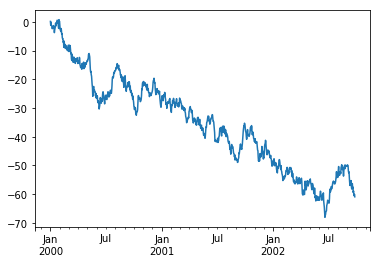

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [98]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.259975,0.903775,0.551689,-0.933876
2000-01-02,-1.568794,1.350933,-0.637468,-0.337829
2000-01-03,-2.335433,2.175153,1.594338,0.511299
2000-01-04,-3.814074,0.402492,0.940510,1.114738
2000-01-05,-3.387966,0.054125,2.551000,-0.082197
2000-01-06,-2.375883,-0.349873,1.126705,-2.030056
2000-01-07,-2.277851,-0.747596,2.446444,-1.735464
2000-01-08,-2.196354,-0.205400,2.166646,-3.684573
2000-01-09,-2.354734,-0.095928,2.191545,-3.247364
2000-01-10,-2.139255,2.271983,3.337886,-3.228287


<Figure size 432x288 with 0 Axes>

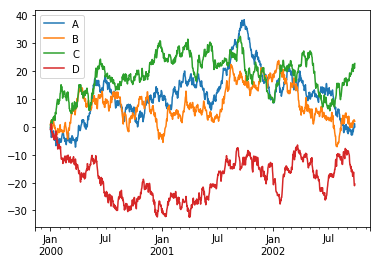

In [99]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### 保存，加载CSV 

In [2]:
import json 
df = pd.DataFrame(np.random.randn(20, 4), 
                   columns=['A', 'B', 'C', 'D'])

NameError: name 'pd' is not defined

In [31]:
df['C'] =  [json.dumps({"c":1, "d":2})  for _, row  in df.iterrows()]
df['D'] =  [json.dumps({"a":1, "b":2})  for _, row  in df.iterrows()]
df.to_csv('foo.csv')

In [1]:
# df1 = pd.read_csv('foo.csv', header=None, names=['c1', 'c2', 'c3', 'c4', 'c5'], 
#                   dtype=[np.float32, np.float32, np.float32, np.float32, np.float32] )
df1 = pd.read_csv('foo.csv', header=0,  names=['c0', 'c1', 'c2', 'c3', 'c4'], 
                  dtype={ 'c2':np.float32}, parse_dates=[0] )
df1['c5'] = df1['c3']  + df1['c4'] 
print(df1.dtypes)
print(df1)
print(type(df1.iloc[2]))
print(str(df1.iloc[2]['c0']))
print(df1[df1['c1']>=0])
print(df1[0:10])
print(df1.sort_values(by='c1'))
print(df1['c0'][0])



NameError: name 'pd' is not defined

### HDF5

In [102]:
# df.to_hdf('foo.h5','df')

ImportError: HDFStore requires PyTables, "No module named 'tables'" problem importing

In [103]:
# pd.read_hdf('foo.h5','df')

FileNotFoundError: File foo.h5 does not exist

### Excel

In [106]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [174]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.204873,-0.443147,-0.518975,-1.214664
2000-01-02,0.675436,-1.143658,-0.740632,-3.399537
2000-01-03,-0.127722,-1.125861,0.867365,-3.798964
2000-01-04,-0.655194,-1.923052,-0.901300,-3.171210
2000-01-05,-0.759355,-1.889169,-1.995941,-2.149461
2000-01-06,-0.690598,-2.453272,-2.224453,-2.063111
2000-01-07,-0.199228,-2.037557,-2.982341,-0.916614
2000-01-08,0.956145,-2.172049,-1.761830,-1.091753
2000-01-09,1.514409,-2.024822,-1.542133,-4.103804
2000-01-10,0.313650,-2.696800,-2.312119,-2.968018


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('VerticaMonitor.csv')
df.head()

plt.grid(True)


data1 = df[df['Environment']=='CacheReadOnly']['Duration_Time']
data2 = df[df['Environment']=='DEV-AVG']['Duration_Time']
data3 = df[df['Environment']=='ITG-AVG']['Duration_Time']
data4 = df[df['Environment']=='PROD-AVG']['Duration_Time']
data = [data1, data2, data3, data4]
plt.boxplot(data)
plt.show()
data1.describe()

df1 = pd.DataFrame({'CacheReadOnly':data1.describe(), 'DEV-AVG':data2.describe(), 'ITG-AVG':data3.describe(), 'PROD-AVG':data4.describe()})
df1

FileNotFoundError: File b'VerticaMonitor.csv' does not exist

In [44]:

import numpy as np
np.linspace(0, 8000, 17, endpoint=True)

array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
        4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
        8000.])

In [12]:
in_data = pd.read_table('C:/eipi10/python-book/learning-from-data/data/in.dta.txt', header=None, names = ['x1', 'x2', 'label'],  delim_whitespace=True)
def get_transform_data(data):
    data['x3'] = data['x1'] * data['x1']
    data['x4'] = data['x2'] * data['x2']
    data['x5'] = data['x1'] * data['x2']
    data['x6'] = abs(data['x1'] - data['x2'])
    data['x7'] = abs(data['x1'] + data['x2'])
    return data

In [14]:
get_transform_data(in_data)

,x1,x2,label,x3,x4,x5,x6,x7
0,-0.779470,0.838221,1,0.607574,0.702615,-0.653369,1.617692,0.058751
1,0.155635,0.895377,1,0.024222,0.801701,0.139352,0.739743,1.051012
2,-0.059908,-0.717780,1,0.003589,0.515208,0.043001,0.657872,0.777688
3,0.207596,0.758933,1,0.043096,0.575980,0.157552,0.551337,0.966530
4,-0.195983,-0.375487,-1,0.038409,0.140991,0.073589,0.179504,0.571470
5,0.588489,-0.842554,1,0.346320,0.709897,-0.495834,1.431043,0.254064
6,0.007199,-0.548316,-1,0.000052,0.300651,-0.003947,0.555515,0.541118
7,0.738839,-0.603394,1,0.545882,0.364084,-0.445811,1.342232,0.135445
8,0.704648,-0.020420,1,0.496529,0.000417,-0.014389,0.725068,0.684228
9,0.969927,0.641371,-1,0.940758,0.411357,0.622083,0.328555,1.611298


In [10]:
in_data

,x1,x2,label,x3
0,-0.779470,0.838221,1,0.607574
1,0.155635,0.895377,1,0.024222
2,-0.059908,-0.717780,1,0.003589
3,0.207596,0.758933,1,0.043096
4,-0.195983,-0.375487,-1,0.038409
5,0.588489,-0.842554,1,0.346320
6,0.007199,-0.548316,-1,0.000052
7,0.738839,-0.603394,1,0.545882
8,0.704648,-0.020420,1,0.496529
9,0.969927,0.641371,-1,0.940758
